# ML 6364 Homework 2 - Submission

**Group Members:**

- Aydin Bagiyev (abagiyev@gwu.edu)
- Narmin Jamalova (njamalova54@gwu.edu)
- Ilyas Karimov (ilyaskarimov@gwu.edu)

## Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np

pd.set_option("max_columns", None) # Demonstrate the values according to the specificed pattern. 

## Reading the Data

In [2]:
# Read .csv files. 
df_original = pd.read_csv("../datasets/student-mat.csv")
df_original.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# 

# Predicting: *Internet Usage(after replacing no/yes with 0/1)*

In [3]:
# copying df for the use
df = df_original.copy()

In [4]:
# define the classification target
target = 'internet' 

## Replacing no/yes with Numerical Values

In [5]:
# Alternative way
# for col in df.columns:
#     if np.prod(np.unique(df[col]) == [ 'no', 'yes']):
#         df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# with pandas method
df = df.replace({'no': 0, 'yes': 1})

In [6]:
# printing dataframe without print() function happen to be more beautiful and easy to read
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Selecting X, y Datasets

In [7]:
# selecting y dataset
y = df[target]

In [8]:
# keep only numeric columns by checking the data type of each series
numeric_cols = [col for col in df.columns if type(df.loc[0, col]) is not str]        

# selecting X dataset
X = df[numeric_cols].drop(target, axis=1)

In [9]:
"internet" in X.columns

False

In [10]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,1,0,0,0,1,1,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,0,1,0,0,0,1,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,1,0,1,0,1,1,0,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,0,1,1,0,1,1,0,4,3,2,1,2,5,4,6,10,10


## Spliting the Datasets into Train/Validation/Test

In [11]:
# split the dataset set into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

# split the dataset set into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2, shuffle=False)

## Building and Training the model

In [12]:
# building the decision tree classifier model
random_forest_classifier = RandomForestClassifier(random_state=42).fit(X_train, y_train)

## Predicting the Result

In [13]:
preds = random_forest_classifier.predict(X_test)
print(preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0]


## Forming Accuracy Test on the Prediction

In [32]:
print(accuracy_score(y_test, preds))

0.7848101265822784


## Calculating Feature Importances

The code below uses the Gini importance score to calculate the importance of each feature for the final result.

Gini importance is computed as the sum of the number of splits where the feature was used divided by the total number of samples resulting in each split. The higher the score, the more important the feature.

In [15]:
for col, score in sorted(zip(X.columns, random_forest_classifier.feature_importances_), key=lambda x: x[1]):
    print(f'Column: {col}\t\tScore: {score}')

Column: higher		Score: 0.013689535703512393
Column: nursery		Score: 0.014793724780232576
Column: romantic		Score: 0.0174296737784049
Column: schoolsup		Score: 0.019505469214265294
Column: famsup		Score: 0.020391488767126178
Column: activities		Score: 0.021996144947169418
Column: failures		Score: 0.025023253220336834
Column: paid		Score: 0.026673873887583015
Column: Dalc		Score: 0.03260826727244289
Column: studytime		Score: 0.03973079810430844
Column: Walc		Score: 0.040944397469483036
Column: famrel		Score: 0.04822060479076011
Column: age		Score: 0.048416816632449775
Column: traveltime		Score: 0.04957996451003274
Column: freetime		Score: 0.053047329210682226
Column: Fedu		Score: 0.05445849266472807
Column: Medu		Score: 0.05555859518472369
Column: health		Score: 0.05992268697833209
Column: goout		Score: 0.06224995863685295
Column: absences		Score: 0.06801298603234955
Column: G3		Score: 0.06961226081424415
Column: G2		Score: 0.07814822938504835
Column: G1		Score: 0.07998544801493145


# 

## Sensitivities With Parameters

### 1. n_estimators

Text(0, 0.5, 'Validation Accuracy')

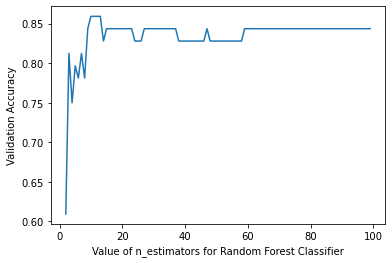

In [16]:
"""
The default value of n_estimators is 100. 
n_estimators is tested between 2 and 100 and the graph is demonstrated down below.
The validation accuracies start leveling out within the range of (18, 100), stabilizing at around 60.\
The accuracy score achieved is higher (appx. 84%) compared to the original model (78%).
"""

scores =[]

for n in range(2, 100):
    # building the model
    random_forest_classifier_est = RandomForestClassifier(random_state=42, n_estimators=n)
    
    # training the model
    random_forest_classifier_est = random_forest_classifier_est.fit(X_train, y_train)
    
    # predicting the model
    preds_random_forest_classifier_est = random_forest_classifier_est.predict(X_val)
    
    # calculating model accuracy
    scores.append(accuracy_score(y_val, preds_random_forest_classifier_est))
    
plt.plot(range(2, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Validation Accuracy')

### 2. criterion

In [17]:
"""
The entropy method gives a higher accuracy result than the Gini method.
"""

# building the model
random_forest_classifier_est_criteria = RandomForestClassifier(random_state=42, criterion='entropy')

# training the model
random_forest_classifier_est_criteria = random_forest_classifier_est_criteria.fit(X_train, y_train)

# predicting the model
preds_random_forest_classifier_est = random_forest_classifier_est_criteria.predict(X_val)

# calculating the model accuracy
print(accuracy_score(y_val, preds_random_forest_classifier_est))

0.84375


### 3. max_depth

Text(0, 0.5, 'Validation Accuracy')

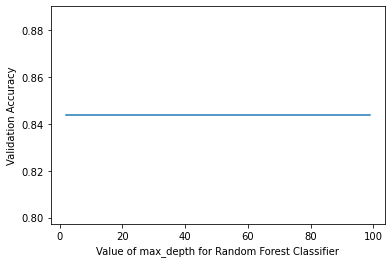

In [18]:
"""
First, we tried RandomForestClassifier with random_state=42 parameter and we got a flat accuracy line (accuracy was = 0.84375) 
Then we erased it to see how accuracy changes for randomly generated data. We got different results: 
In one, the accuracy sharply decreased from 0.84375 to 0.828 at max_depth=150 and then continuously increased to 0.84375 
In another case, it decreased at max_depth=100 to 0.828 and then increased to 0.84375 and remained stable.
"""

scores = []

for depth in range(2, 100):
    # building and training the model
    random_forest_classifier_depth = RandomForestClassifier(random_state=42, max_depth=depth).fit(X_train, y_train)
    
    # predicting the model
    preds_random_forest_classifier_depth = random_forest_classifier_depth.predict(X_val)
    
    # calculating the model accuracy
    scores.append(accuracy_score(y_val, preds_random_forest_classifier_depth))
    
plt.plot(range(2, 100), scores)
plt.xlabel('Value of max_depth for Random Forest Classifier')
plt.ylabel('Validation Accuracy') 

### 4. min_samples_split

Text(0, 0.5, 'Validation Accuracy')

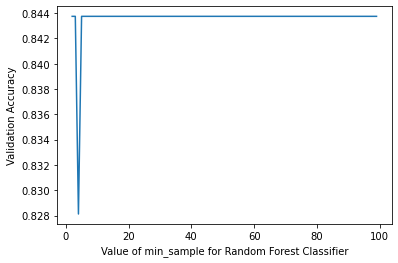

In [19]:
"""
With min_samples_split, we can observe the same tendency of accuracy dropping from 0.84375 to 0.828 and rising back. 
"""

scores = []

for sample in range(2,100):
    # building and training the model
    random_forest_classifier_min_sample = RandomForestClassifier(random_state=42, min_samples_split=sample).fit(X_train, y_train)
    
    # predicting the model
    preds_random_forest_classifier_min_sample = random_forest_classifier_min_sample.predict(X_val)
    
    # calculating the model accuracy
    scores.append(accuracy_score(y_val, preds_random_forest_classifier_min_sample))
    
plt.plot(range(2,100), scores)
plt.xlabel('Value of min_sample for Random Forest Classifier')
plt.ylabel('Validation Accuracy')

### 5. max_features

In [20]:
"""
With max_features='log2', the number of features are down to square root of (the number of features).
This resulted in 0.84 accuracy score.
"""

# building and training the model
random_forest_classifier_max_features = RandomForestClassifier(random_state=42, max_features='log2').fit(X_train, y_train)

# predicting the model
preds_random_forest_classifier_max_features = random_forest_classifier_max_features.predict(X_val)

# calculating the model accuracy
print(accuracy_score(y_val, preds_random_forest_classifier_max_features))

0.84375


## Testing on Holdout

In [45]:
best_random_forest_classifier = RandomForestClassifier(random_state=42, min_samples_split=20).fit(X_train, y_train)
print(accuracy_score(y_test, best_random_forest_classifier.predict(X_test)))

maxftr_log2_random_forest_classifier = RandomForestClassifier(random_state=42, max_features='log2').fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, maxftr_log2_random_forest_classifier))

0.7848101265822784
0.7721518987341772


We have tested five different parameters on the validation set and the accuracy scores converge to almost the same number. However, we have to note that only one random_state was selected for the purposes of this exercise, considering time and resource limits.

The results don't seem to generalize at random_state=42. For instance, in the cell above, there is appx. 1% difference in scores between the best model and a randomly chosen model.

This might be due to following factors: 
    1. Distribution of data according to the chosen random state, which we have already mentioned above.
    2. The number of observations might be too low to observe a significant uptake / decrease in the scores.
    

# 

# Modifiying Dataset: ***Feature Labeling VS One-Hot Encoding***

In [22]:
# viewing the dataset for futher modifications(Feature Labeling VS One-Hot Encoding)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [23]:
"""
Label encoding is utilized when there's a rational explanaton behind the values of that column, such as 
"no" and "yes", which are opposite values or "low", "medium", and "high" which can be compared and it's obvious
that to some extent, "high" has more capacity/size than "medium". However, neither of the columns, except the ones with binary values, seems to have such a pattern among the values. 
Therefore, label encoding is used for binary values, and one-hot encoding is for those columns which have unique values more or equal than 3. 
"""

for col in df.columns:
    # getting value count for all columns to detect unique element size
    vals = df[col].value_counts(dropna=True).to_dict()
    
    # checking whether the type of the column is string
    if type(df[col][0]) is str:
        
        # FEATURE LABELING
        if len(vals.keys()) == 2: # filtering 2 unique element size == 2 columns
            # setting numeric values (0/1 pair is used for labeling)
            df[col] = df[col].apply(lambda x: 1 if x == list(vals.keys())[0] else 0)
        
        # ONE-HOT ENCODING
        else: # filtering 2 unique element size > 2 columns
            
            # creating unique column for each element
            for index, value in enumerate(vals.keys()):
                # setting new numeric values (index + 1 is used for the labeling and 0 otherwise)
                # new name is automatically generating: old column name + element
                df[f'{col}_{value}'] = df[col].apply(lambda x: index + 1 if value == x else 0)
                
            # droping the old column    
            df = df.drop(col, axis=1)

In [24]:
# viewing the dataframe for the changes
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_other,Mjob_services,Mjob_at_home,Mjob_teacher,Mjob_health,Fjob_other,Fjob_services,Fjob_teacher,Fjob_at_home,Fjob_health,reason_course,reason_home,reason_reputation,reason_other,guardian_mother,guardian_father,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,3,0,0,0,0,3,0,0,1,0,0,0,1,0,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,3,0,0,1,0,0,0,0,1,0,0,0,0,2,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,3,0,0,1,0,0,0,0,0,0,0,4,1,0,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0,5,0,2,0,0,0,0,2,0,0,1,0,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,3
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


## Selecting X, y Datasets

In [25]:
# selecting y dataset
y = df[target]

In [26]:
# selecting X dataset by dropping the non-numeric + target columns
X = df[numeric_cols].drop(target, axis=1)

## Spliting the Datasets into Train/Test

In [27]:
# split the dataset set into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

## Building and Training the model

In [28]:
random_forest_classifier_retrained = RandomForestClassifier(random_state=42).fit(X_train, y_train)

## Predicting the Result

In [29]:
preds_random_forest_classifier_retrained = random_forest_classifier_retrained.predict(X_test)

## Calculating the Accuracy

In [30]:
print(accuracy_score(y_test, preds_random_forest_classifier_retrained))

0.7721518987341772
